import data

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
len(y_train)

60000

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
len(y_test)

10000

Show the image


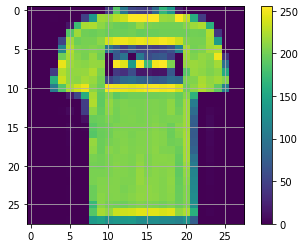

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(which='major')
plt.show()

In [ ]:
y_train[1]

0

reshape

In [ ]:
nsamples, nx, ny = x_train.shape
x_train = x_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = x_test.shape
x_test = x_test.reshape((nsamples,nx*ny))

normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

create a validation set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=0)
print('train:', x_train.shape, y_train.shape)
print('validation:', x_val.shape, y_val.shape)
print('test:', x_test.shape, y_test.shape)

train: (54000, 784) (54000,)
validation: (6000, 784) (6000,)
test: (10000, 784) (10000,)


apply LR

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(fit_intercept=True,
             multi_class='auto',
             penalty='l2',
             solver='lbfgs',
             max_iter=10000,
             C=1)
LR.fit(x_train, y_train)

LogisticRegression(C=1, max_iter=10000)

In [ ]:
result=LR.score(x_test,y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 84.45%


RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomForestC = RandomForestClassifier(n_estimators=100,
                     criterion='entropy',
                     max_depth=100,
                     random_state=0)
randomForestC.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=100, random_state=0)

In [ ]:
result=randomForestC.score(x_test,y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 87.67%


hyperparameter 

In [ ]:
parameter_space = {"max_depth": [60, 80, 100],
          "criterion": ["gini", "entropy"]}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
RF = RandomForestClassifier(random_state=0)
grid_RF = GridSearchCV(RF, parameter_space)
grid_RF.fit(x_train, y_train)
print(grid_RF.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=60, random_state=0)


In [ ]:
print("Accuracy: %.2f%%" % (grid_RF.best_score_*100.0))

Accuracy: 88.19%


MLP

Define the MLP model

In [ ]:
import tensorflow.keras as keras
import sys
sys.modules['keras'] = keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [ ]:
model = Sequential()
model.add(Dense(units=256, activation='relu', input_shape=(784,)))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
loss_train_list=[]
loss_val_list=[]
print('train:', x_train.shape, y_train.shape)
print('validation:', x_val.shape, y_val.shape)
print('test:', x_test.shape, y_test.shape)

train: (54000, 784) (54000,)
validation: (6000, 784) (6000,)
test: (10000, 784) (10000,)


In [ ]:
y_trainMLP = keras.utils.to_categorical(y_train, 10)
y_valMLP = keras.utils.to_categorical(y_val, 10)
y_testMLP = keras.utils.to_categorical(y_test, 10)
print('train:', x_train.shape, y_trainMLP.shape)
print('validation:', x_val.shape, y_valMLP.shape)
print('test:', x_test.shape, y_testMLP.shape)

train: (54000, 784) (54000, 10)
validation: (6000, 784) (6000, 10)
test: (10000, 784) (10000, 10)


train the model

In [ ]:
acc_train_list=[]
acc_val_list=[]
for epoch in range(0, 65):
    #set epochs=1
    print('epoch', epoch)
    history=model.fit(x_train, y_trainMLP, batch_size=64, epochs=1, validation_data=(x_val, y_valMLP))
    loss_train_list.extend(history.history['loss'])
    loss_val_list.extend(history.history['val_loss'])
    acc_train_list.extend(history.history['accuracy'])
    acc_val_list.extend(history.history['val_accuracy'])

epoch 0
844/844 [==============================] - 5s 4ms/step - loss: 0.8895 - accuracy: 0.7179 - val_loss: 0.6263 - val_accuracy: 0.7882
epoch 1
844/844 [==============================] - 3s 4ms/step - loss: 0.5599 - accuracy: 0.8119 - val_loss: 0.5422 - val_accuracy: 0.8090
epoch 2
844/844 [==============================] - 3s 4ms/step - loss: 0.4991 - accuracy: 0.8292 - val_loss: 0.4841 - val_accuracy: 0.8327
epoch 3
844/844 [==============================] - 3s 4ms/step - loss: 0.4664 - accuracy: 0.8386 - val_loss: 0.4634 - val_accuracy: 0.8460
epoch 4
844/844 [==============================] - 3s 4ms/step - loss: 0.4443 - accuracy: 0.8472 - val_loss: 0.4352 - val_accuracy: 0.8510
epoch 5
844/844 [==============================] - 3s 4ms/step - loss: 0.4297 - accuracy: 0.8503 - val_loss: 0.4268 - val_accuracy: 0.8548
epoch 6
844/844 [==============================] - 3s 4ms/step - loss: 0.4156 - accuracy: 0.8556 - val_loss: 0.4297 - val_accuracy: 0.8517
epoch 7
844/844 [==========

test the model

In [ ]:
score = model.evaluate(x_test, y_testMLP, batch_size=128, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.34291571378707886
Test accuracy: 0.8802000284194946


the test accuracy is 88.86%

2D CNN

reshape

In [ ]:
x_train = x_train.reshape(-1,28,28)
x_test = x_test.reshape(-1,28,28)
x_val = x_val.reshape(-1,28,28)

In [ ]:
x_trainCNN = np.expand_dims(x_train, axis=-1)
x_testCNN = np.expand_dims(x_test, axis=-1)
x_valCNN = np.expand_dims(x_val, axis=-1)

print('train:', x_trainCNN.shape, y_train.shape)
print('validation:', x_valCNN.shape, y_val.shape)
print('test:', x_testCNN.shape, y_test.shape)

train: (54000, 28, 28, 1) (54000,)
validation: (6000, 28, 28, 1) (6000,)
test: (10000, 28, 28, 1) (10000,)


define the model

In [ ]:
from keras.layers import Dense, BatchNormalization, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, Adam
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation = 'relu'))
model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=10,  activation='softmax'))
optimizer=Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense_3 (Dense)             (None, 1024)              12846080  
                                                                 
 dense_4 (Dense)             (None, 10)                10250     
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


train the model

In [ ]:
loss_train_list=[]
acc_train_list=[]
loss_val_list=[]
acc_val_list=[]
loss_test_list=[]
acc_test_list=[]
for epoch in range(40, 61):
    #-------- training and validation--------------------------------
    print('epoch', epoch)
    history=model.fit(x_trainCNN, y_train, batch_size=64, validation_data=(x_valCNN, y_val))    
    loss_train=history.history['loss'][0]
    acc_train=history.history['accuracy'][0]        
    loss_val=history.history['val_loss'][0]
    acc_val=history.history['val_accuracy'][0]     
    loss_train_list.append(loss_train)
    acc_train_list.append(acc_train)
    loss_val_list.append(loss_val)
    acc_val_list.append(acc_val)    
    print('epoch', epoch, 'training loss:', loss_train, 'accuracy:', acc_train)
    print('epoch', epoch, 'validation loss:', loss_val, 'accuracy:', acc_val)

epoch 40
844/844 [==============================] - 19s 14ms/step - loss: 0.3643 - accuracy: 0.8683 - val_loss: 0.2797 - val_accuracy: 0.8915
epoch 40 training loss: 0.3643053472042084 accuracy: 0.8682963252067566
epoch 40 validation loss: 0.27970242500305176 accuracy: 0.8914999961853027
epoch 41
844/844 [==============================] - 12s 14ms/step - loss: 0.2307 - accuracy: 0.9151 - val_loss: 0.2462 - val_accuracy: 0.9085
epoch 41 training loss: 0.23067227005958557 accuracy: 0.9150555729866028
epoch 41 validation loss: 0.24623681604862213 accuracy: 0.9085000157356262
epoch 42
844/844 [==============================] - 12s 14ms/step - loss: 0.1769 - accuracy: 0.9329 - val_loss: 0.2175 - val_accuracy: 0.9202
epoch 42 training loss: 0.17685559391975403 accuracy: 0.9328518509864807
epoch 42 validation loss: 0.21754850447177887 accuracy: 0.9201666712760925
epoch 43
844/844 [==============================] - 12s 14ms/step - loss: 0.1320 - accuracy: 0.9504 - val_loss: 0.2411 - val_accura

test

In [ ]:
score = model.evaluate(x_testCNN, y_test)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 5ms/step - loss: 0.6009 - accuracy: 0.9202
Test loss: 0.6008636355400085
Test accuracy: 0.920199990272522


Accuracy is 92%